# CHAPTER 6 차원 축소

# 1. PCA(Principal Component Analysis)

- PCA 실습은 와인 데이터셋 (Wine)으로 진행합니다. 아래의 셀을 로드하고 실습을 시작해주세요.

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
wine = load_wine()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = wine.feature_names
wineDF = pd.DataFrame(wine.data, columns=columns)
wineDF['target'] = wine.target
wineDF.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


# 1-1. 원본 와인 데이터 세트가 어떻게 분포돼 있는지 두 개의 속성(alcohol,	malic_acid)을 각각 X축, Y축으로 해서 2차원으로 시각화 해주세요.

- ##답안## 을 채워주세요

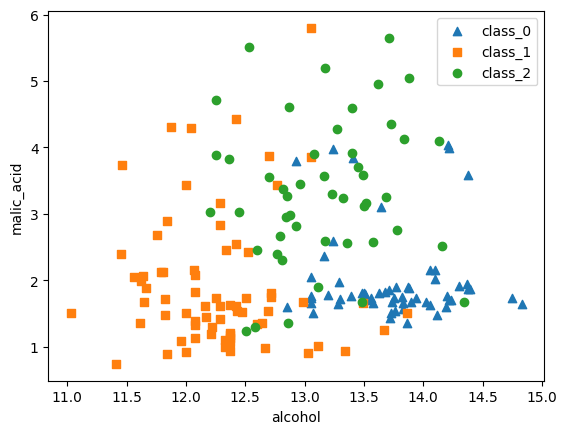

In [ ]:
# wine0는 세모, wine1는 네모, wine2는 동그라미로 표현
markers=['^', 's', 'o']

# wine0의 target 값은 0, wine1는 1, wine2는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = wineDF[wineDF['target']==i]['alcohol']
    y_axis_data = wineDF[wineDF['target']==i] ['malic_acid']
    plt.scatter(x_axis_data, y_axis_data,marker=marker,label=wine.target_names[i])

plt.legend()
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.show()

- PCA 적용 전, 개별 속성 스케일링하는 셀을 실행해주세요

In [ ]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
wine_scaled = StandardScaler().fit_transform(wineDF.iloc[:, :-1])

# 1-2. PCA 적용 -> 4차원 와인 데이터를 2차원 PCA 데이터로 변환

- ##답안##을 채워주세요.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(wine_scaled)
wine_pca = pca.transform(wine_scaled)
print(wine_pca.shape)

(178, 2)


변환된 PCA 데이터 세트를 DataFrame으로 변환하여 데이터값 확인하는 코드 셀을 실행해주세요.

In [ ]:
# PCA 변환된 데이터의 칼럼명을 각각 pca_component_1, pca_component_2로 명명

pca_columns=['pca_component_1','pca_component_2']
wineDF_pca = pd.DataFrame(wine_pca, columns=pca_columns)
wineDF_pca['target']=wine.target
wineDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,3.316751,1.443463,0
1,2.209465,-0.333393,0
2,2.516740,1.031151,0


PCA 변환된 데이터 세트 2차원 시각화하는 코드 셀을 실행해주세요.

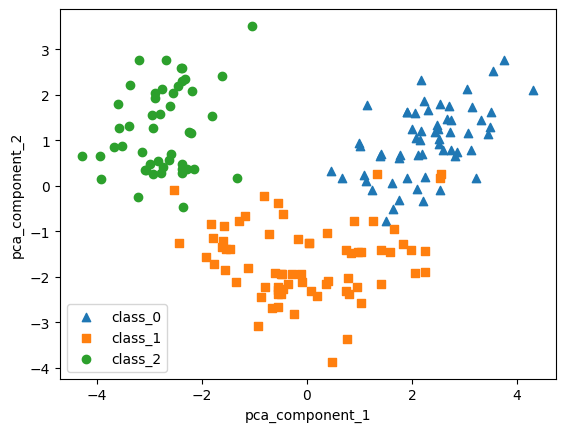

In [ ]:
# wine0를 세모, wine1를 네모, wine2를 동그라미로 표시
markers=['^', 's', 'o']

# pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = wineDF_pca[wineDF_pca['target']==i]['pca_component_1']
    y_axis_data = wineDF_pca[wineDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=wine.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

# 1-3. PCA Component별 원본 데이터 변동성 반영률을 확인

- ##답안##을 채워주세요

In [ ]:
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749 ]


# 1-4. 원본 와인 데이터 세트 & PCA로 변환된 데이터 세트에 각각 분류 적용

# (1). 원본 와인 데이터에 Random Forest를 적용하기 위한 ##답안##을 채우세요.

조건 ) Estimator는 RandomForestClassifier를 이용하고
cross_val_score()로 3개의 교차 검증 세트로 정확도 결과를 비교하세요.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf,wine.data,wine.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.95       0.89830508 1.        ]
원본 데이터 평균 정확도: 0.9494350282485876


# (2). PCA로 변환된 데이터 세트에 Random Forest를 적용하기 위한 ##답안##을 채우세요.

조건 ) Estimator는 RandomForestClassifier를 이용하고 cross_val_score()로 3개의 교차 검증 세트로 정확도 결과를 비교하세요.

In [ ]:
pca_X = wineDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf,pca_X,wine.target,scoring='accuracy',cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print( 'PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.93333333 0.91525424 0.96610169]
PCA 변환 데이터 평균 정확도: 0.9382297551789077


# 2. LDA(Linear Discriminant Analysis)

# 2-1. PDA와 LDA의 주요한 공통점과 차이점을 각각 한 가지씩 설명하세요.

**공통점**

: 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이다.

---
**차이점**

: PCA는 입력 데이터의 변동성의 가장 큰 축을 찾지만 LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.

# 2-2. 괄호 안의 두 단어 중 해당하는 단어를 각각 적으세요.

# 문제 : 좋은 클래스 분리를 위해서는 클래스 간 분산이 (1) (크고 / 작고), 클래스 내부 분산이 (2) (큰 / 작은) 것을 선택해야 합니다.

# **답안 :**

(1) 크고


(2) 작은

# **[와인 데이터 세트에 LDA 적용하기]**

와인 데이터 세트 로드하고, 표준 정규 분포로 스케일링하는 코드 셀을 실행시켜주세요.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

wine = load_wine()
wine_scaled = StandardScaler().fit_transform(wine.data)

# 2-3. 2개의 컴포넌트로 와인 데이터를 LDA 변환하는 코드 셀의 ##답안##을 채우세요.

In [ ]:
Ida = LinearDiscriminantAnalysis(n_components=2)
Ida.fit(wine_scaled,wine.target)
wine_Ida = Ida.transform(wine_scaled)
print(wine_Ida.shape)

(178, 2)


# 2-4. LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현하는 코드 셀의 ##답안##을 채우세요.

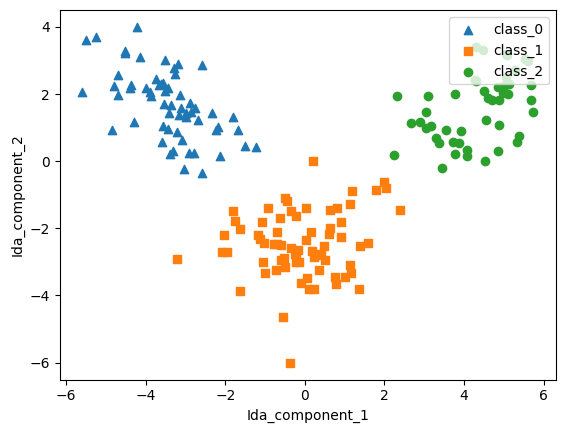

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Ida_columns=['Ida_component_1', 'Ida_component_2']
wineDF_Ida = pd.DataFrame(wine_Ida, columns=Ida_columns)
wineDF_Ida['target']=wine.target

# wine0는 세모, wine1는 네모, wine2는 동그라미로 표현
markers = ['^', 's', 'o']

# wine0의 target 값은 0, wine1는 1, wine2는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = wineDF_Ida [wineDF_Ida ['target']==i] ['Ida_component_1']
    y_axis_data = wineDF_Ida [wineDF_Ida['target']==i] ['Ida_component_2']

    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=wine.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('Ida_component_1')
plt.ylabel('Ida_component_2')
plt.show()

# 3. SVD

# 3-1) SVD 연산 및 분해하기

랜덤한 2차원 행렬 A를 생성해 특이값 분해하고, 분해된 행렬을 이용해 원본 행렬로 다시 복원해 봅시다.

(1) 행렬 A 생성

: 넘파이의 rand() 함수를 이용해 3x3 크기의 랜덤한 값을 갖는 행렬 A를 생성해 주세요.

In [ ]:
import numpy as np

# 3x3 랜덤 행렬 A 생성
np.random.seed(121)
A = np.random.randn(3,3)
print(np.round(A,3))

[[-0.212 -0.285 -0.574]
 [-0.44  -0.33   1.184]
 [ 1.615  0.367 -0.014]]


(2) SVD (특이값 분해)

: 넘파이의 SVD 모듈로 A 행렬에 SVD를 적용해 U, Sigma, Vt를 반환받아 그 크기와 값을 출력해 주세요.

(행렬 원소 값은 소수점 아래 3자리까지 반올림해서 출력)

In [ ]:
from numpy.linalg import svd

U, Sigma, Vt = svd(A)

# U, Sigma, Vt의 크기 출력
print(U.shape,Sigma.shape,Vt.shape)

# U, Sigma, Vt 행렬 출력
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma,3))
print('V transpose matrix:\n', np.round(Vt,3))

(3, 3) (3,) (3, 3)
U matrix:
 [[-0.056  0.489  0.87 ]
 [-0.472 -0.781  0.409]
 [ 0.88  -0.388  0.274]]
Sigma Value:
 [1.797 1.261 0.294]
V transpose matrix:
 [[ 0.913  0.275 -0.3  ]
 [-0.307 -0.019 -0.951]
 [ 0.268 -0.961 -0.067]]


(3) U, Sigma, Vt를 이용해 원본 행렬 A 복원하기

: 넘파이(np)의 dot 연산을 이용해 원본 행렬 A를 계산해 주세요.

(💡 Sigma 행렬은 현재 대각원소 값만을 가지는 1차원 벡터이므로, 0을 포함한 대칭행렬로 변환 후 계산해야 합니다 - 넘파이의 diag 함수 사용!)

In [ ]:
# Sigma를 다시 0을 포함한 대칭 행렬로 변환
Sigma_mat = np.diag(Sigma)

# 복원 행렬 A_ 계산
A_ = np.dot(np.dot(U,Sigma_mat),Vt)

print(np.round(A_, 3))

[[-0.212 -0.285 -0.574]
 [-0.44  -0.33   1.184]
 [ 1.615  0.367 -0.014]]


# 3-2) row 간 의존성을 갖는 데이터 세트에 SVD 적용하고 복원하기

이번에는 row 간 의존성이 있는 데이터 세트에 SVD를 적용해 Sigma 값이 어떻게 달라지는지 관찰하고, 0이 아닌 Sigma 값만을 이용해 행렬 A를 복원해 봅시다.

(1) A를 row 간 의존성이 있는 값으로 수정하기

: A의 1번째 로우가 2번째 로우와 3번째 로우 값의 합을 가지도록 값을 수정해 주세요.

In [ ]:
A[0]=A[1]+A[2]
print(np.round(A, 3))

[[ 1.175  0.037  1.17 ]
 [-0.44  -0.33   1.184]
 [ 1.615  0.367 -0.014]]


(2) 수정된 A에 SVD를 다시 적용해 U, Sigma, Vt 행렬의 크기와 값을 확인하기

In [ ]:
U, Sigma, Vt =svd(A)

# U, Sigma, Vt의 크기 출력
print(U.shape,Sigma.shape,Vt.shape)

# U, Sigma, Vt 행렬 출력
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma,3))
print('V transpose matrix:\n', np.round(Vt,3))

(3, 3) (3,) (3, 3)
U matrix:
 [[-0.708 -0.407 -0.577]
 [-0.002 -0.816  0.577]
 [-0.706  0.41   0.577]]
Sigma Value:
 [2.155 1.599 0.   ]
V transpose matrix:
 [[-0.915 -0.132 -0.381]
 [ 0.34   0.253 -0.906]
 [ 0.216 -0.958 -0.187]]


(3) Sigma의 값이 0인 요소를 제외하고 A 복원하기

: Sigma가 0인 데이터를 제외하고 복원해 봅시다. Sigma에서 0 값을 제외했다면, 이에 대응되는 U, Vt의 값도 제외해 주어야 합니다.

In [ ]:
# U 행렬의 경우 Sigma와 내적 수행 -> Sigma 데이터가 0이 아닌 값에 대응되는 열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])

# Vt 행렬 또한 Sigma와 내적 수행 -> Sigma 데이터가 0이 아닌 값에 대응되는 행만 추출
Vt_ = Vt[:2]

print(U_.shape, Sigma_.shape, Vt_.shape)

# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
A_ = np.dot(np.dot(U_,Sigma_),Vt_)
print(np.round(A_,3))

(3, 2) (2, 2) (2, 3)
[[ 1.175  0.037  1.17 ]
 [-0.44  -0.33   1.184]
 [ 1.615  0.367 -0.014]]


# 3-3) 사이킷런의 TruncatedSVD 클래스를 이용해 변환하기
사이킷런의 TruncatedSVD 클래스를 이용해 사이킷런의 wine 데이터를 변환하고, PCA 변환 결과와도 비교해 봅시다.

- 모듈 임포트 & 데이터셋 로드

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

wine = load_wine()
wine_ftrs = wine.data

(1) TruncatedSVD 객체 생성하고 변환 수행하기

: 3개의 주요 component로 TruncatedSVD 객체를 생성하고, fit()과 transform() 함수를 이용해 데이터를 변환해 주세요.

In [ ]:
# 3개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=3)
tsvd.fit(wine_ftrs)
wine_tsvd = tsvd.transform(wine_ftrs)

(2) Scatter plot 2차원으로 변환된 데이터 시각화하기

: matplotlib.pyplot 라이브러리로 변환된 데이터를 표현해 주세요. x축은 wine_tsvd의 0번째 열, y축은 wine_tsvd의 1번째 열로 설정하고 데이터는 타겟값으로 설정해 주세요.

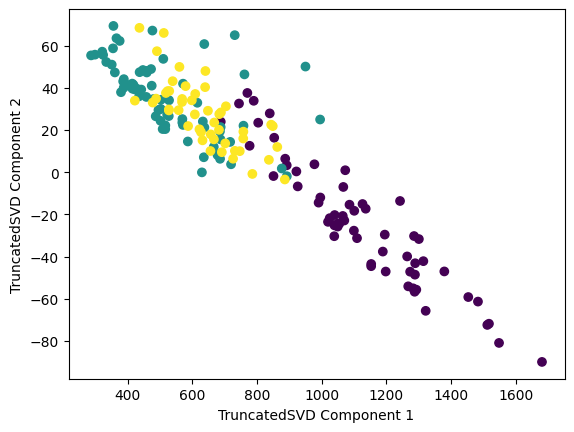

In [ ]:
# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현
plt.scatter(x = wine_tsvd[:,0], y = wine_tsvd[:,1], c = wine.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

plt.show()

# 4. LMF

wine 데이터를 사이킷런의 NMF 클래스를 이용해 3개의 컴포넌트로 변환하고 이를 시각화해 봅시다.

- 위 1-3) 문제의 모듈 임포트 & 데이터셋 로드 셀을 실행하고 진행해 주세요!

(1) NMF 객체 생성하고 변환 수행하기

: 3개의 주요 component로 NMF 객체를 생성하고, fit()과 transform() 함수를 이용해 데이터를 변환해 주세요.

In [ ]:
from sklearn.decomposition import NMF

# NMF 객체 생성
nmf = NMF(n_components=3)

# 변환하기
nmf.fit(wine_ftrs)
wine_nmf = nmf.transform(wine_ftrs)

(2) Scatter plot 2차원으로 변환된 데이터 시각화하기

: matplotlib.pyplot 라이브러리로 변환된 데이터를 표현해 주세요. x축은 wine_nmf의 0번째 열, y축은 wine_nmf의 1번째 열로 설정하고 데이터는 타겟값으로 설정해 주세요.

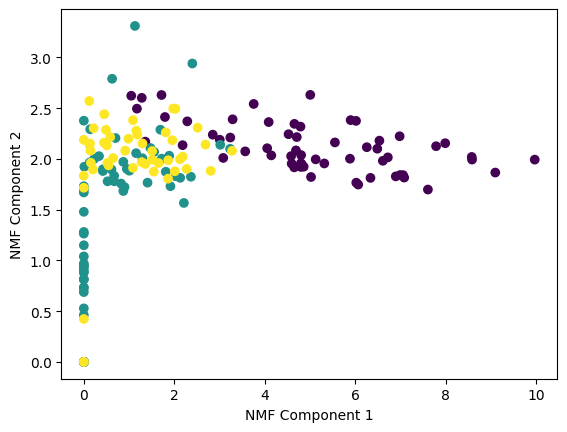

In [ ]:
# Scatter plot 2차원으로 NMF 변환 된 데이터 표현
plt.scatter(x = wine_nmf[:,0], y = wine_nmf[:,1], c = wine.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

plt.show()

# 5. T-SNE

데이터 세트: https://www.kaggle.com/datasets/zalando-research/fashionmnist?select=fashion-mnist_test.csv

# 5-1. T-SNE를 적용하여 2차원으로 축소하세요.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')
fashion_df = pd.read_csv("/content/drive/MyDrive/EURON/test/fashion-mnist_test.csv")

# 이미지 픽셀 정보만 추출
X = fashion_df.iloc[:, 1:]
y = fashion_df.iloc[:, 0]

# 표준화
X_norm = StandardScaler().fit_transform(X)

# 차원 축소
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X_norm)

print('Number of Features in Fashion-MNIST Dataset Before T-SNE : {}\n\nNumber of Features in Fashion-MNIST Dataset After T-SNE : {}'.format(X.shape[1], X_tsne.shape[1]))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of Features in Fashion-MNIST Dataset Before T-SNE : 784

Number of Features in Fashion-MNIST Dataset After T-SNE : 2


# 5-2. T-SNE를 적용한 데이터를 이용해 시각화를 진행하세요.

Text(0.5, 1.0, 'Fashion MNIST Dataset T-SNE')

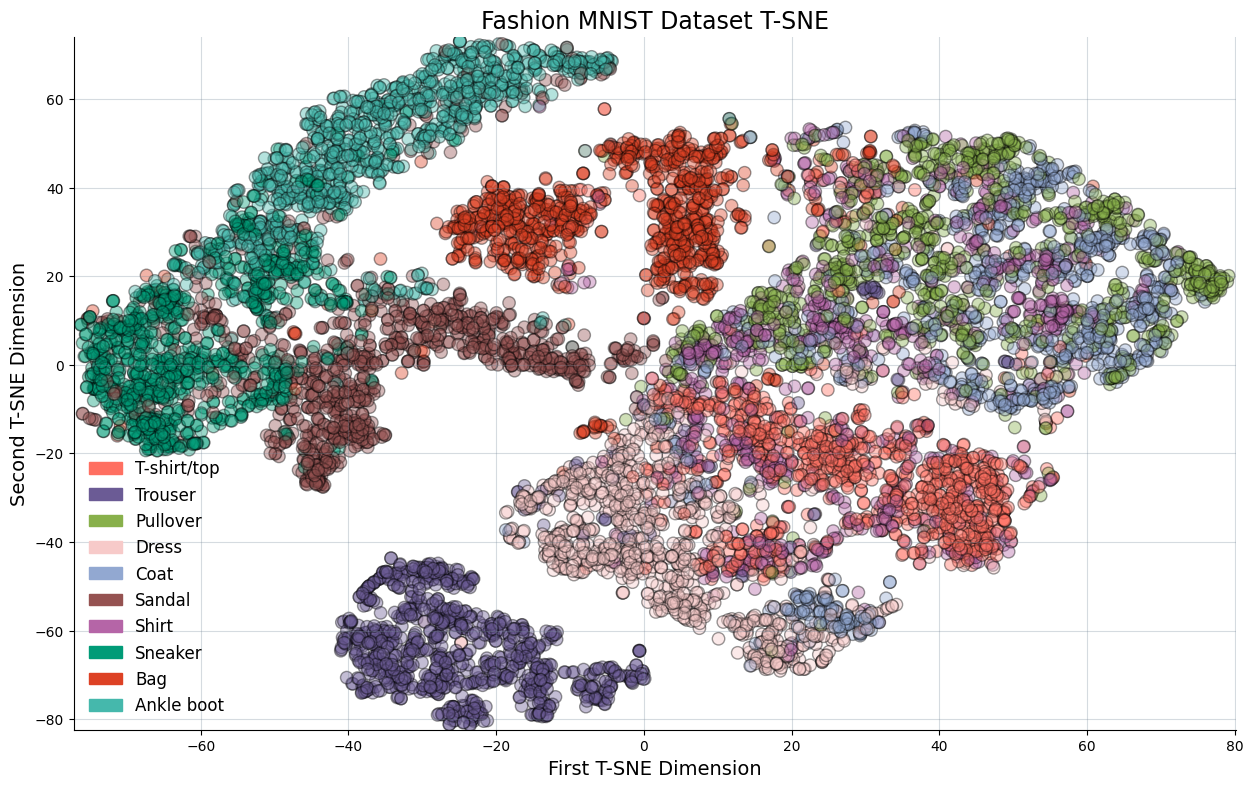

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

# 시각화 함수 정의
def plot_labelled_scatter(X, y, class_labels, s):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() -1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() -1, X[:, 1].max() + 1

    color_array = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure(figsize=s)

    plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=cmap_bold, norm=bnorm, alpha=0.4, edgecolor='black', lw=1)
    sp = plt.gca().spines
    sp['top'].set_visible(False)
    sp['right'].set_visible(False)

    plt.grid(which='both', color='lightslategrey', alpha=0.3)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h, fontsize=12, frameon=False)

# 시각화 함수 실행
plot_labelled_scatter(
    X_tsne,
    y,
    ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
     'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    (15, 9)
)

plt.xlabel('First T-SNE Dimension', fontsize=14)
plt.ylabel('Second T-SNE Dimension', fontsize=14)
plt.title('Fashion MNIST Dataset T-SNE', fontsize=17)

# 6. UMAP

# 6-1. UMAP을 적용하여 이미지 데이터의 차원을 2차원으로 축소하세요.

In [ ]:
from sklearn.preprocessing import StandardScaler
import umap
import pandas as pd

# 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')
fashion_df = pd.read_csv("/content/drive/MyDrive/EURON/test/fashion-mnist_test.csv")

# 입력값과 레이블 분리
X = fashion_df.iloc[:, 1:]
y = fashion_df.iloc[:, 0]

# 표준화
X_scaled = StandardScaler().fit_transform(X)

# UMAP 객체 생성 및 차원 축소 수행
um = umap.UMAP(random_state=42)
X_umap = um.fit_transform(X_scaled)

print('Number of Features in Fashion MNIST Dataset Before UMAP : {}\n\nNumber of Features in Fashion MNIST Dataset After UMAP: {}'.format(X.shape[1], X_umap.shape[1]))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of Features in Fashion MNIST Dataset Before UMAP : 784

Number of Features in Fashion MNIST Dataset After UMAP: 2


# 6-2. UMAP으로 차원 축소한 데이터를 시각화하세요.

In [ ]:
# 다음 코드를 실행하세요
!pip install umap-learn

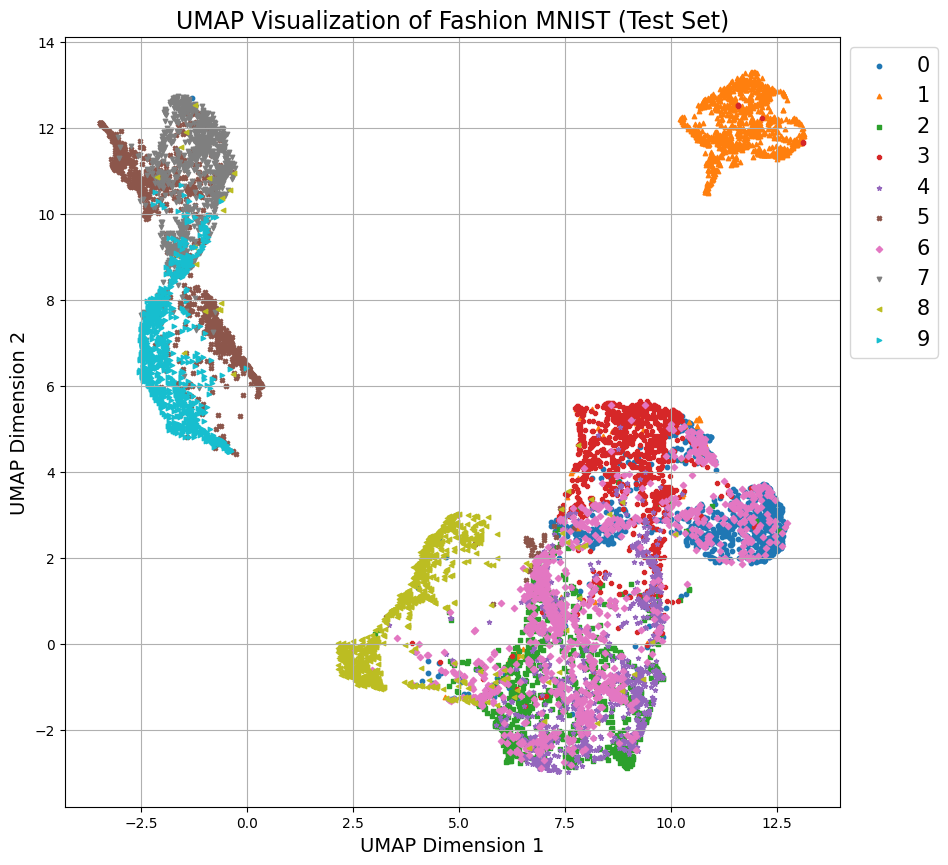

In [ ]:
import matplotlib.pyplot as plt

markers = ['o', '^', 's', 'P', '*', 'X', 'D', 'v', '<', '>']

plt.figure(figsize=(10, 10))
for i, marker in enumerate(markers):
    plt.scatter(*X_umap[y == i].T, label=i, s=10, alpha=1, marker=marker)

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left', fontsize=15)
plt.xlabel('UMAP Dimension 1', fontsize=14)
plt.ylabel('UMAP Dimension 2', fontsize=14)
plt.title('UMAP Visualization of Fashion MNIST (Test Set)', fontsize=17)
plt.grid(True)
plt.show()

# 캐글 필사

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_canc, y_canc) = load_breast_cancer(return_X_y = True)

In [5]:
def plot_labelled_scatter(X,y,class_labels,s):
  num_labels=len(class_labels)

  x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
  y_min,y_max=X[:,1].min()-1,X[:,1].max()+1

  marker_array=['o','^','*']
  color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
  cmap_bold = ListedColormap(color_array)
  bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
  plt.figure(figsize=s)

  plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.4, edgecolor='black', lw = 1)
  sp = plt.gca().spines
  sp['top'].set_visible(False)
  sp['right'].set_visible(False)

  plt.grid(which='both',color='lightslategrey',alpha=0.3)

  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)

  h = []
  for c in range(0, num_labels):
      h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
  plt.legend(handles=h,fontsize=15,frameon=False)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

canc_norm = StandardScaler().fit(X_canc).transform(X_canc)

pca = PCA(n_components = 2).fit(canc_norm)

canc_pca = pca.transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before PCA : {}\n\nNumber of Features in Breast Cancer DataSet After PCA : {}'
      .format(X_canc.shape[1],canc_pca.shape[1]))

Number of Features in Breat Cancer DataSet Before PCA : 30

Number of Features in Breast Cancer DataSet After PCA : 2


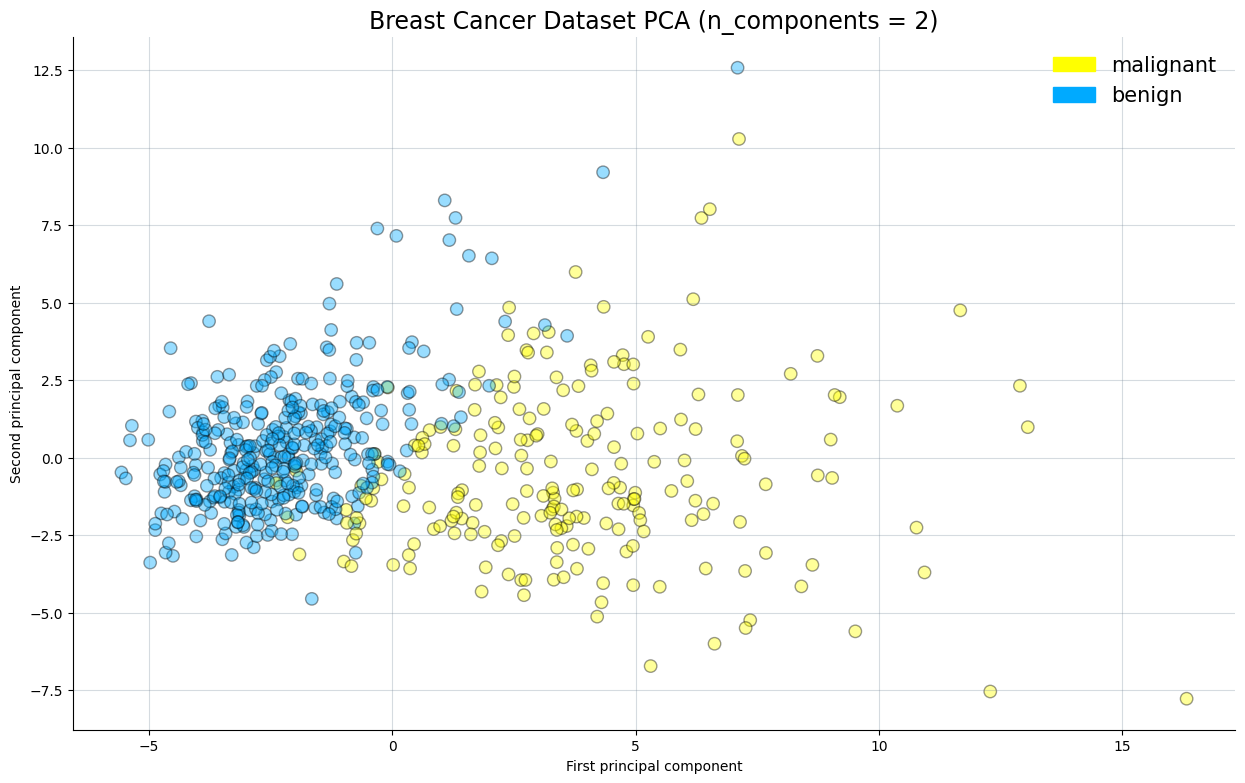

In [11]:
plot_labelled_scatter(canc_pca, y_canc, ['malignant', 'benign'],(15,9)) #Using the Helper Function

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)',fontsize=17);

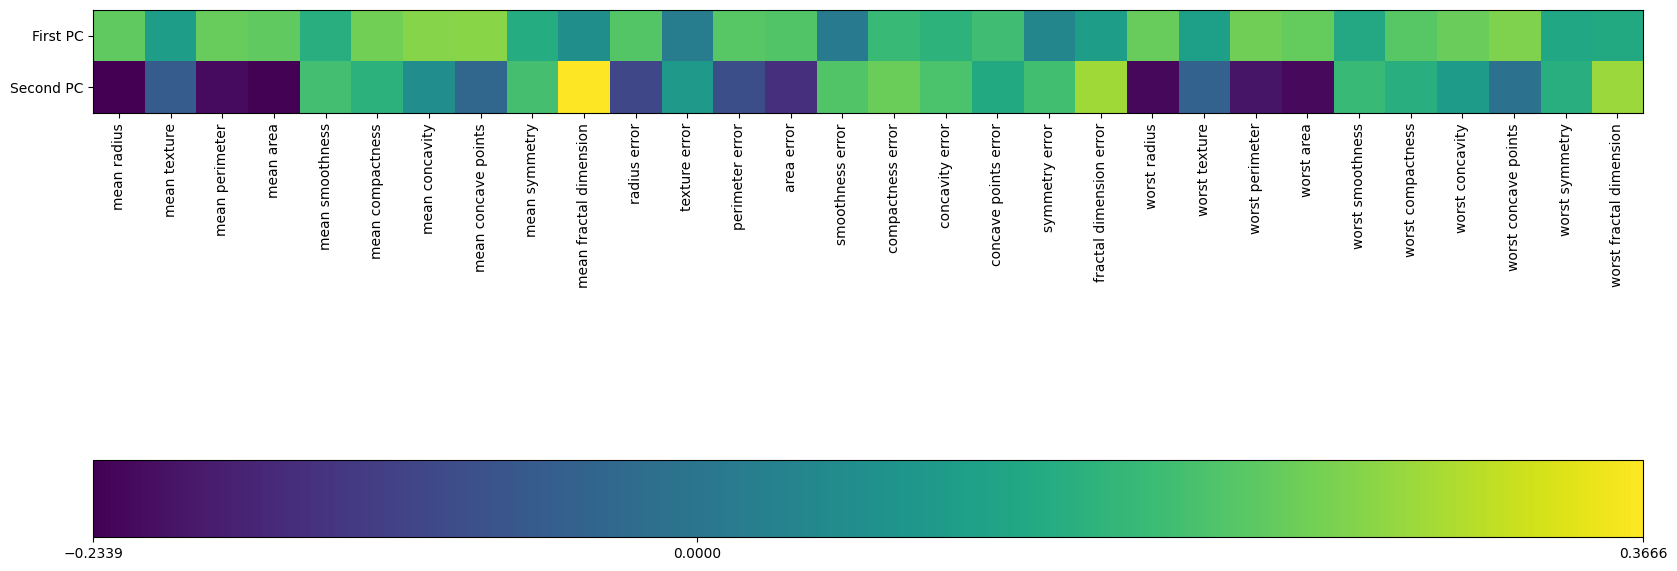

In [12]:
fig = plt.figure(figsize=(20,9))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'viridis')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(len(feature_names)));
plt.gca().set_yticks(np.arange(2));
plt.gca().set_xticklabels(feature_names, rotation=90);
plt.gca().set_yticklabels(['First PC', 'Second PC']);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0,
                                              pca.components_.max()], pad=0.5);


Number of Features in Breat Cancer DataSet Before MDS : 30

Number of Features in Breast Cancer DataSet After MDS : 2


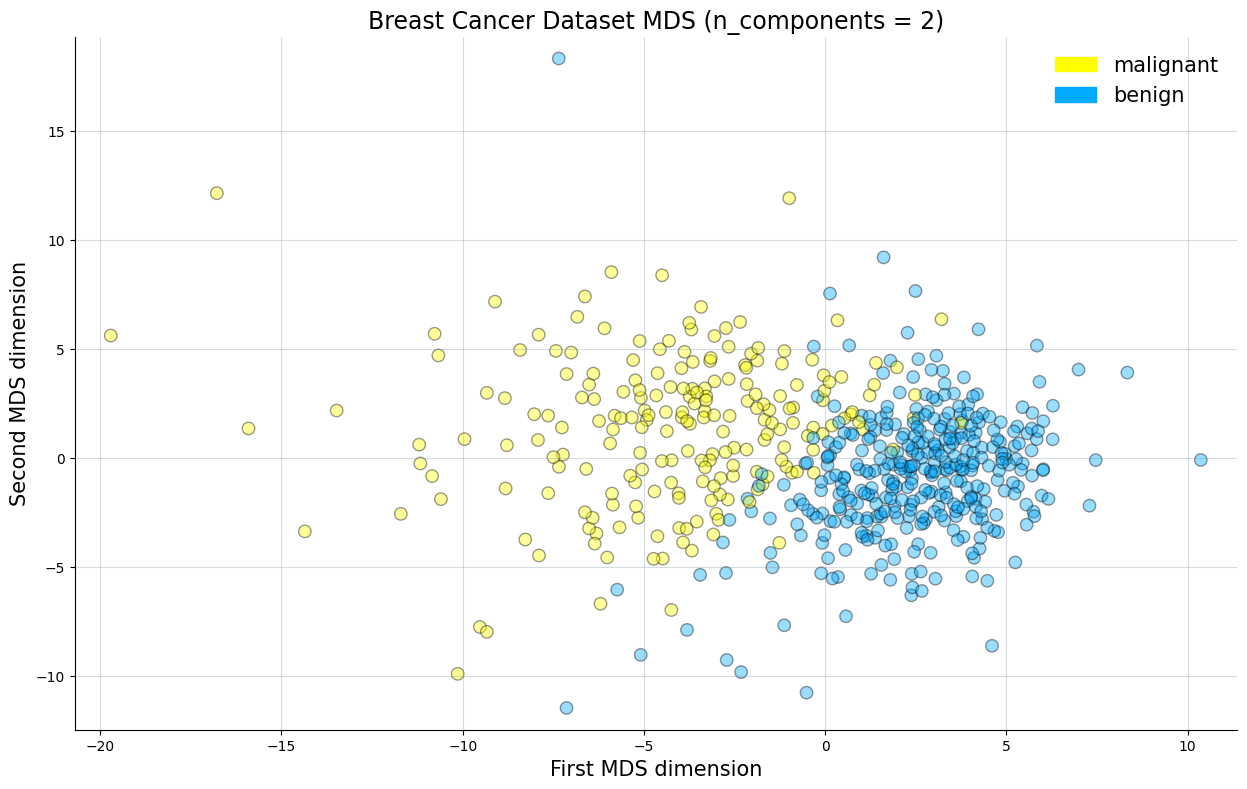

In [9]:
from sklearn.manifold import MDS

mds = MDS(n_components = 2,random_state = 2)

canc_mds = mds.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before MDS : {}\n\nNumber of Features in Breast Cancer DataSet After MDS : {}'
      .format(X_canc.shape[1],canc_mds.shape[1]))

plot_labelled_scatter(canc_mds, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First MDS dimension',fontsize=15)
plt.ylabel('Second MDS dimension',fontsize=15)
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

Number of Features in Breat Cancer DataSet Before T-SNE : 30

Number of Features in Breast Cancer DataSet After T-SNE : 2


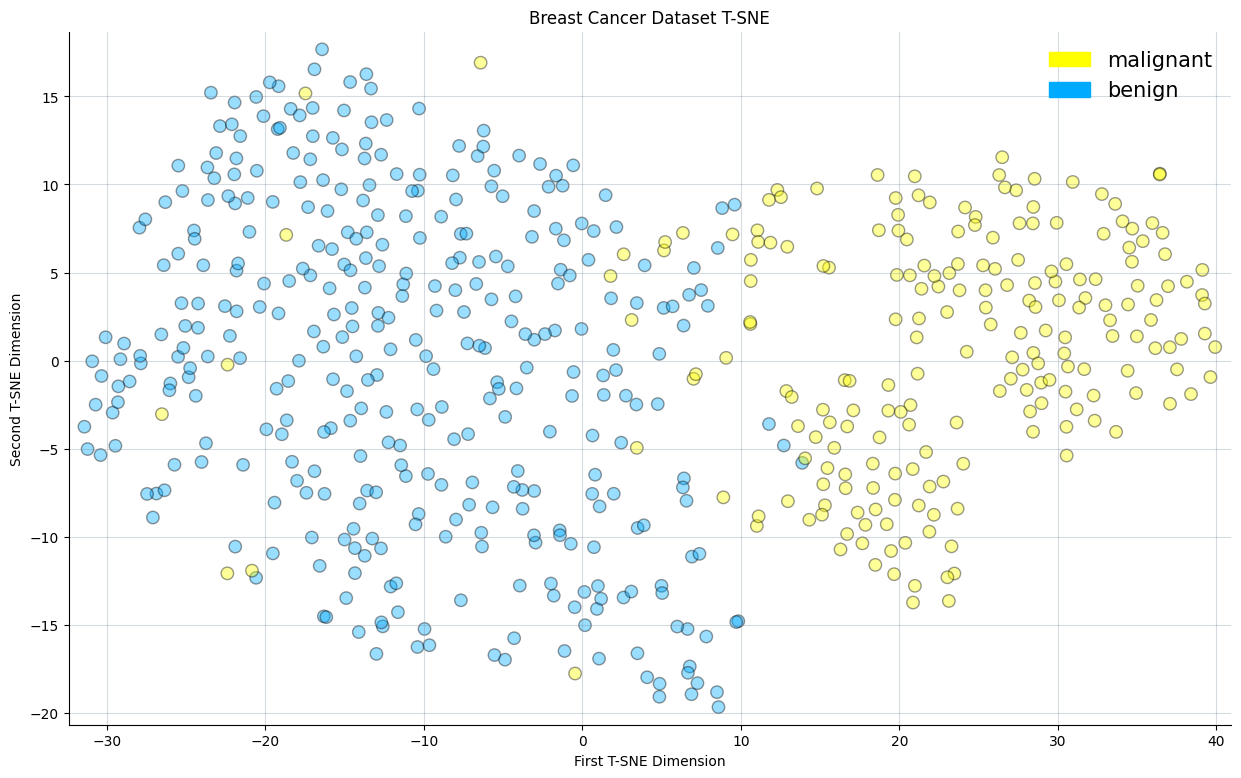

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 42)

canc_tsne = tsne.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before T-SNE : {}\n\nNumber of Features in Breast Cancer DataSet After T-SNE : {}'
      .format(X_canc.shape[1],canc_tsne.shape[1]))

plot_labelled_scatter(canc_tsne, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First T-SNE Dimension')
plt.ylabel('Second T-SNE Dimension')
plt.title('Breast Cancer Dataset T-SNE');